# Plot the sea temperature data on a Map

- Use the orthographic projection
- Use the the last time step
- Use Honolullu Hawai as the projection center (21.3000° N, 157.8167° W)

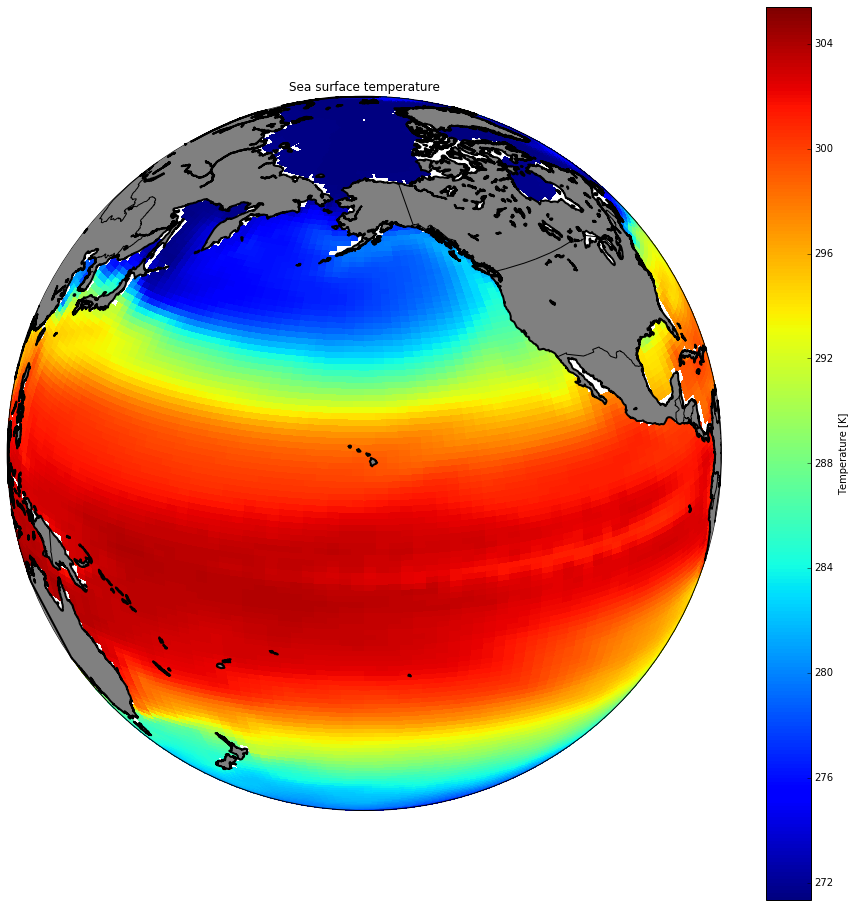

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma

fig=plt.figure(figsize=(16,16))
filename = "tos_O1_2001-2002.nc"
ds = Dataset(filename, mode="r")


lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
tos = ds.variables["tos"][:,:,:]
# Create the map
m = Basemap(lat_0=21, lon_0=-157, area_thresh=1000.0, projection='ortho',resolution='l')

m.drawcoastlines(linewidth=2)
m.fillcontinents(color='gray')
m.drawcountries(linewidth=1)

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp = m.pcolor(x,y,tos[12,:,:])
cbar = plt.colorbar(cp)
cbar.set_label("Temperature [K]")
plt.title("Sea surface temperature")
plt.show()